In [78]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Define the function to derivate 

def dy_dx(y,x):
    return x - y
    
xs = np.linspace (0, 5, 100)
y0 = 1
ys = odeint(dy_dx, y0, xs)
ys = ys.flatten()

In [80]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys);

Maximum difference between the complex and real versions is 0.0


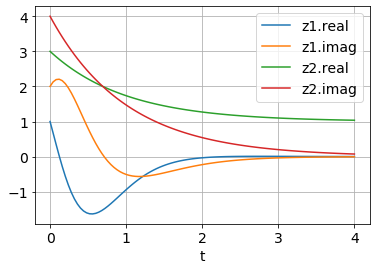

In [52]:
import numpy as np
from scipy.integrate import odeint


def odeintz(func, z0, t, **kwargs):
    """An odeint-like function for complex valued differential equations."""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z


if __name__ == "__main__":
    # Generate a solution to:
    #     dz1/dt = -z1 * (K - z2)
    #     dz2/dt = L - z2
    # K and L are fixed parameters.  z1(t) and z2(t) are complex-
    # valued functions of t.

    # Define the right-hand-side of the differential equation.
    def zfunc(z, t, K, L):
        z1, z2 = z
        return [-z1 * (K - z2), L - z2] 

    # Set up the inputs and call odeintz to solve the system.
    z0 = np.array([1+2j, 3+4j])
    t = np.linspace(0, 4, 101)
    K = 3
    L = 1
    z, infodict = odeintz(zfunc, z0, t, args=(K,L), full_output=True)

    # For comparison, here is how the complex system can be converted
    # to a real system.  The real and imaginary parts are used to
    # write a system of four coupled equations.  The formulas for
    # the complex right-hand-sides are
    #   -z1 * (K - z2) = -(x1 + i*y1) * (K - (x2 + i*y2))
    #                  = (-x1 - i*y1) * (K - x2 + i(-y2))
    #                  = -x1 * (K - x2) - y1*y2 + i*(-y1*(K - x2) + x1*y2)
    # and
    #   L - z2 = L - (x2 + i*y2)
    #          = (L - x2) + i*(-y2)
    def func(r, t, K, L):
        x1, y1, x2, y2 = r
        dx1dt = -x1 * (K - x2) - y1*y2
        dy1dt = -y1 * (K - x2) + x1*y2
        dx2dt = L - x2
        dy2dt = -y2
        return [dx1dt, dy1dt, dx2dt, dy2dt]

    # Use regular odeint to solve the real system.
    r, infodict = odeint(func, z0.view(np.float64), t, args=(K,L), full_output=True)

    # Compare the two solutions.  They should be the same.  (As usual for
    # floating point calculations, there could be a small difference.)
    delta_max = np.abs(z.view(np.float64) - r).max()
    print("Maximum difference between the complex and real versions is", delta_max)


    # Plot the real and imaginary parts of the complex solution.

    import matplotlib.pyplot as plt

    plt.clf()
    plt.plot(t, z[:,0].real, label='z1.real')
    plt.plot(t, z[:,0].imag, label='z1.imag')
    plt.plot(t, z[:,1].real, label='z2.real')
    plt.plot(t, z[:,1].imag, label='z2.imag')
    plt.xlabel('t')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

In [53]:
type(1+1j)

complex

In [83]:
from scipy.integrate import ode

y0, t0 = [1.0j, 2.0], 0

def f(t,y,arg1):
    return [1j*arg1*y[0] + y[1], -arg1*y[1]**2]
def jac(t,y,arg1):
    return [[1j*arg1, 1], [0, -arg1*2*y[1]]]

r = ode(f, jac).set_integrator('zvode', method='bdf')
r.set_initial_value(y0, t0).set_f_params(2.0).set_jac_params(2.0)
t1 = 10
dt = 1

In [84]:
while r.successful() and r.t < t1:
    print(r.t+dt, r.integrate(r.t+dt))

1 [-0.71038232+0.23749653j  0.40000271+0.j        ]
2.0 [0.19098503-0.52359246j 0.22222356+0.j        ]
3.0 [0.47153208+0.52701229j 0.15384681+0.j        ]
4.0 [-0.61905937+0.30726255j  0.11764744+0.j        ]
5.0 [0.02340997-0.61418799j 0.09523835+0.j        ]
6.0 [0.58643071+0.339819j 0.08000018+0.j      ]
7.0 [-0.52070105+0.44525141j  0.06896565+0.j        ]
8.0 [-0.15986733-0.61234476j  0.06060616+0.j        ]
9.0 [0.64850462+0.15048982j 0.05405414+0.j        ]
10.0 [-0.38404699+0.56382299j  0.04878055+0.j        ]


In [135]:
from odeintw import odeintw

def zfunc(z, t, K, L, M):
    z1, z2 = z
    print(t)
    return [-z1 * (K - z2), L - M*z2]

def zjac(z, t, K, L, M):
    z1, z2 = z
    jac = np.array([[z2 - K, z1], [0, -M]])
    return jac

# Initial conditions.
z0 = np.array([1+2j, 3+4j])

# Desired time samples for the solution.
t = np.linspace(0, 5, 101)

# Parameters.
K = 2
L = 4 - 2j
M = 2.5

In [136]:
# Call odeintw
z, infodict = odeintw(zfunc, z0, t, args=(K, L, M), Dfun=zjac, full_output=True)

0.0
6.01215667591043e-06
6.01215667591043e-06
1.202431335182086e-05
1.202431335182086e-05
0.0007733066615797614
0.0007733066615797614
0.001534589009807702
0.001534589009807702
0.0022958713580356425
0.0022958713580356425
0.005387454783682634
0.005387454783682634
0.004657182970655686
0.004657182970655686
0.00701849458327573
0.00701849458327573
0.009379806195895773
0.009379806195895773
0.011741117808515816
0.011741117808515816
0.016463741033755905
0.016463741033755905
0.02118636425899599
0.02118636425899599
0.025908987484236076
0.025908987484236076
0.030631610709476162
0.030631610709476162
0.03535423393471625
0.03535423393471625
0.04675748596637029
0.04675748596637029
0.058160737998024334
0.058160737998024334
0.06956399002967838
0.06956399002967838
0.08096724206133242
0.08096724206133242
0.09237049409298646
0.09237049409298646
0.1037737461246405
0.1037737461246405
0.1174304621199127
0.1174304621199127
0.13108717811518492
0.13108717811518492
0.14474389411045713
0.14474389411045713
0.158400

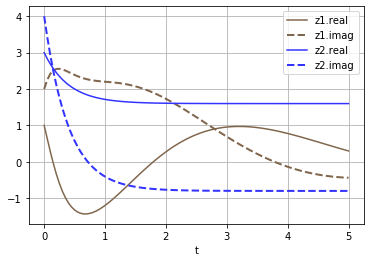

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline


color1 = (0.5, 0.4, 0.3)
color2 = (0.2, 0.2, 1.0)
plt.plot(t, z[:, 0].real, color=color1, label='z1.real', linewidth=1.5)
plt.plot(t, z[:, 0].imag, '--', color=color1, label='z1.imag', linewidth=2)
plt.plot(t, z[:, 1].real, color=color2, label='z2.real', linewidth=1.5)
plt.plot(t, z[:, 1].imag, '--', color=color2, label='z2.imag', linewidth=2)
plt.xlabel('t')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [119]:
from odeintw import odeintw

def time_dep(t):
    return (np.sin(t))

coefficients = {'coeff1' : lambda x: time_dep(x)}

def zfunc(z, t, K, L, M):
    z1, z2 = z
    return [K * z1 + L * z2, M*z2]

def zjac(z, t, K, L, M):
    z1, z2 = z
    jac = np.array([[K, L], [0, M]])
    return jac

print(coefficients['coeff1'](0))

0.0


In [138]:
# Initial conditions.
z0 = np.array([0+0j, 1+0j])

# Desired time samples for the solution.
t0 = np.linspace(0, 50, 1001)

# Auxiliar parameters

g = 2 * np.pi * 1
wc = 2 * np.pi* 1000
wm = 2 * np.pi* 0.1
wx = 2 * np.pi* 1000
Am = 2 * np.pi* 250
w = wc + wm*Am*coefficients['coeff1'](t)


# Parameters.
K = -1j * w
L = -1j * g
M = -1j * wx

print(M)

# print(K, L, M)


-6283.185307179586j


In [139]:
z, infodict = odeintw(zfunc, z0, t0, args=(K, L, M), Dfun=zjac, full_output=True)

0.0


TypeError: only length-1 arrays can be converted to Python scalars

In [107]:
%matplotlib

color1 = (0.5, 0.4, 0.3)
color2 = (0.2, 0.2, 1.0)
plt.plot(t, z[:, 0].real, color=color1, label='z1.real', linewidth=1.5)
plt.plot(t, z[:, 0].imag, '--', color=color1, label='z1.imag', linewidth=2)
plt.plot(t, z[:, 1].real, color=color2, label='z2.real', linewidth=1.5)
plt.plot(t, z[:, 1].imag, '--', color=color2, label='z2.imag', linewidth=2)
plt.xlabel('t')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Using matplotlib backend: MacOSX


In [132]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

t = 0 

def time_dep(t):
    return (10 * np.exp(-t))

coefficients = {'coeff1' : lambda x: 1+time_dep(x)}

def func(state, t, coefficients):
    mrna    = state[0]
    protein = state[1]
    dt_mrna = coefficients['coeff1'](t) * mrna * protein
    dt_protein = coefficients['coeff1'](t) * protein
    #print(coefficients['coeff1'](t))
    return[dt_mrna,dt_protein]

state0 = [1,1]
t = np.arange(0,100,0.1)

solve = odeint(func,state0,t,args=(coefficients,))
plt.plot(t,solve)
plt.show()